In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
file = "Old 2020 Covid Analysis - Sheet1.csv"
df = pd.read_csv(file)
df

,Day #,infections
0,1,1
1,2,4
2,3,4
3,4,6
4,5,7
...,...,...
128,129,13624
129,130,13746
130,131,13792
131,132,13924


Text(0, 0.5, '# of covid infections')

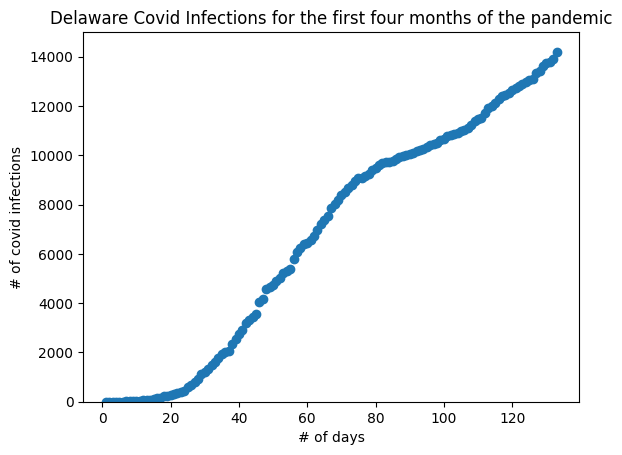

In [6]:
%matplotlib inline
df = df.rename({"Day #": "DayDE", "infections": "DEInfections"}, axis="columns")

plt.ylim(0, 15000)
plt.scatter(df.DayDE, df.DEInfections)
plt.title("Delaware Covid Infections for the first four months of the pandemic")
plt.xlabel("# of days")
plt.ylabel("# of covid infections")

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['DayDE']].values, df[['DEInfections']].values)

LinearRegression()

In [9]:
reg.predict([[200]])

array([[22795.8762051]])

In [10]:
reg.coef_

array([[120.70069169]])

In [11]:
reg.intercept_

array([-1344.2621326])

In [12]:
(120.70069169 * 200) - 1344.2621326

22795.8762054

In [13]:
d = pd.read_csv(file)
d.head(20)

,Day #,infections
0,1,1
1,2,4
2,3,4
3,4,6
4,5,7
5,6,8
6,7,16
7,8,26
8,9,30
9,10,39


C:\Users\maxwe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


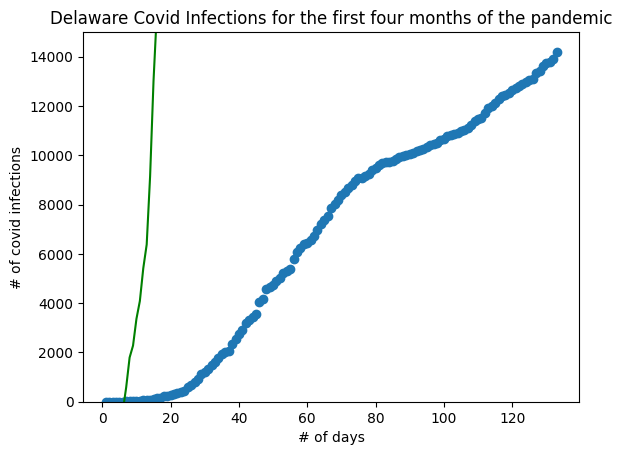

In [14]:
%matplotlib inline
d = d.rename({"Day #": "DayDE", "infections": "DEInfections"}, axis="columns")

plt.ylim(0, 15000)
plt.scatter(d.DayDE, d.DEInfections)
plt.title("Delaware Covid Infections for the first four months of the pandemic")
plt.xlabel("# of days")
plt.ylabel("# of covid infections")
plt.plot(d.DayDE, reg.predict(d[['DEInfections']]), color="green")

In [16]:
import math
median_infections = math.floor(d.DEInfections.median())
median_infections

7869

In [17]:
d.DEInfections.fillna(median_infections)

0          1
1          4
2          4
3          6
4          7
       ...  
128    13624
129    13746
130    13792
131    13924
132    14202
Name: DEInfections, Length: 133, dtype: int64